<a href="https://colab.research.google.com/github/Gi-Woong/SDA-TeamProject/blob/main/SDA_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록(colab)
%matplotlib inline

# 그래프에 retina format 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# sns.set() 쓰지 말것! -> 폰트 지정 옵션 초기화돼서 한글폰트 깨짐

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib as mpl
# import matplotlib.pyplot as plt


# 데이터 불러오기 및 사전 처리

- 사용 데이터
    - 재정 자립도
    - 재정 자주도
- 기타 고려 변수
    - 과징금 및 과태료

DataFrame 변수 명
 
- df1: 서울시 구별 조사망률 및 사망건수(2015~2021)
- df2: 일반회계 세입결산(과태료 및 과징금)(2015~2021)
- df3: 서울시 구별 재정자립도
- df4: 서울시 구별 재정자주도

In [4]:
def read_excel(url, **kwargs):
    return pd.read_excel(url, engine='openpyxl', header=None, **kwargs)

# 서울시 구별 조사망률
df_1 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%82%AC%EB%A7%9D%EB%A5%A0%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")
# 과징금 데이터
df_2 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EA%B3%BC%EC%A7%95%EA%B8%88%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")
# 서울시 구별 재정자립도
df_3 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EB%A6%BD%EB%8F%84.xlsx?raw=true")
# 서울시 구별 재정자주도
df_4 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EC%A3%BC%EB%8F%84.xlsx?raw=true")

# EDA 및 데이터 전처리

### 서울시 구별 조사망률 및 사망건수

In [5]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,자치구별,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021
1,자치구별(1),자치구별(2),사망건수,조사망률,사망건수,조사망률,사망건수,조사망률,사망건수,조사망률,사망건수,조사망률,사망건수,조사망률,사망건수,조사망률
2,합계,종로구,829,5.5,823,5.5,826,5.6,897,6,854,5.8,867,6,982,6.9
3,NaN,중구,689,5.6,669,5.5,684,5.7,710,5.8,665,5.5,723,5.9,806,6.7
4,NaN,용산구,1113,4.9,1137,5.1,1150,5.2,1203,5.5,1107,5.1,1145,5.2,1265,5.8


In [6]:
df_1 = df_1.T
df_1.columns = ["연도", "수치명"] + list(df_1.iloc[1][2:])
df_1 = df_1.iloc[2:]
df_1

,연도,수치명,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2,2015,사망건수,829,689,1113,1244,1472,1833,2050,2154,...,2573,1731,1139,1701,1677,2008,1396,1751,2127,1857
3,2015,조사망률,5.5,5.6,4.9,4.3,4.1,5.2,5,4.7,...,4.4,4.1,4.9,4.6,4.2,4,3.2,3.1,3.3,4
4,2016,사망건수,823,669,1137,1304,1344,1921,2013,2139,...,2594,1794,1163,1643,1667,2137,1480,1780,2174,1791
5,2016,조사망률,5.5,5.5,5.1,4.5,3.8,5.5,5,4.8,...,4.4,4.3,5,4.5,4.2,4.3,3.4,3.2,3.3,4
6,2017,사망건수,826,684,1150,1399,1346,1780,2068,2097,...,2574,1749,1167,1560,1641,2068,1446,1756,2239,1877
7,2017,조사망률,5.6,5.7,5.2,4.7,3.8,5.1,5.1,4.8,...,4.4,4.3,5,4.3,4.2,4.2,3.3,3.2,3.4,4.3
8,2018,사망건수,897,710,1203,1383,1512,1895,2178,2215,...,2759,1922,1133,1659,1720,2179,1435,1796,2334,1905
9,2018,조사망률,6,5.8,5.5,4.6,4.3,5.5,5.4,5.1,...,4.7,4.8,4.9,4.6,4.4,4.4,3.3,3.3,3.6,4.5
10,2019,사망건수,854,665,1107,1369,1385,1851,2049,2184,...,2691,1811,1199,1708,1703,2107,1421,1838,2278,1898
11,2019,조사망률,5.8,5.5,5.1,4.6,4,5.4,5.2,5.1,...,4.6,4.5,5.2,4.7,4.4,4.3,3.4,3.5,3.4,4.5


조사망률과 사망건수로 나누기

In [7]:
df_1_rate = df_1[df_1["수치명"]=="조사망률"].drop(columns="수치명")
df_1_rate

,연도,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
3,2015,5.5,5.6,4.9,4.3,4.1,5.2,5,4.7,5.7,...,4.4,4.1,4.9,4.6,4.2,4,3.2,3.1,3.3,4
5,2016,5.5,5.5,5.1,4.5,3.8,5.5,5,4.8,5.7,...,4.4,4.3,5,4.5,4.2,4.3,3.4,3.2,3.3,4
7,2017,5.6,5.7,5.2,4.7,3.8,5.1,5.1,4.8,5.9,...,4.4,4.3,5,4.3,4.2,4.2,3.3,3.2,3.4,4.3
9,2018,6,5.8,5.5,4.6,4.3,5.5,5.4,5.1,6.2,...,4.7,4.8,4.9,4.6,4.4,4.4,3.3,3.3,3.6,4.5
11,2019,5.8,5.5,5.1,4.6,4,5.4,5.2,5.1,6,...,4.6,4.5,5.2,4.7,4.4,4.3,3.4,3.5,3.4,4.5
13,2020,6,5.9,5.2,4.7,4.3,5.7,5.8,5.2,6.4,...,4.7,4.7,5.5,4.8,4.6,4.5,3.4,3.5,3.5,4.3
15,2021,6.9,6.7,5.8,5,4.5,6.2,6,5.4,6.8,...,5,5.4,5.8,5.3,4.9,5.1,3.7,3.7,3.9,4.7


In [8]:
df_1_num = df_1[df_1["수치명"]=="사망건수"].drop(columns="수치명")
df_1_num

,연도,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2,2015,829,689,1113,1244,1472,1833,2050,2154,1854,...,2573,1731,1139,1701,1677,2008,1396,1751,2127,1857
4,2016,823,669,1137,1304,1344,1921,2013,2139,1845,...,2594,1794,1163,1643,1667,2137,1480,1780,2174,1791
6,2017,826,684,1150,1399,1346,1780,2068,2097,1873,...,2574,1749,1167,1560,1641,2068,1446,1756,2239,1877
8,2018,897,710,1203,1383,1512,1895,2178,2215,1960,...,2759,1922,1133,1659,1720,2179,1435,1796,2334,1905
10,2019,854,665,1107,1369,1385,1851,2049,2184,1874,...,2691,1811,1199,1708,1703,2107,1421,1838,2278,1898
12,2020,867,723,1145,1363,1486,1911,2245,2265,1968,...,2694,1892,1245,1746,1770,2209,1433,1867,2300,1901
14,2021,982,806,1265,1420,1516,2061,2319,2320,2036,...,2884,2137,1325,1958,1890,2481,1541,1920,2579,2122


In [9]:
#사망건수 melt
df_1_num_m = df_1_num.melt(
    id_vars='연도', 
    value_vars=df_1_num.columns[1:],
    var_name="자치구별",
    value_name="사망건수"
    )
df_1_num_m.head()

,연도,자치구별,사망건수
0,2015,종로구,829
1,2016,종로구,823
2,2017,종로구,826
3,2018,종로구,897
4,2019,종로구,854


In [10]:
#조사망률 melt
df_1_rate_m = df_1_rate.melt(
    id_vars="연도", 
    value_vars=df_1_rate.columns[1:],
    var_name="자치구별",
    value_name="조사망률"
    )
df_1_rate_m.head()

,연도,자치구별,조사망률
0,2015,종로구,5.5
1,2016,종로구,5.5
2,2017,종로구,5.6
3,2018,종로구,6
4,2019,종로구,5.8


In [11]:
  df_1_melt = pd.concat([df_1_num_m, df_1_rate_m["조사망률"]], axis=1)
  df_1_melt

,연도,자치구별,사망건수,조사망률
0,2015,종로구,829,5.5
1,2016,종로구,823,5.5
2,2017,종로구,826,5.6
3,2018,종로구,897,6
4,2019,종로구,854,5.8
...,...,...,...,...
170,2017,강동구,1877,4.3
171,2018,강동구,1905,4.5
172,2019,강동구,1898,4.5
173,2020,강동구,1901,4.3


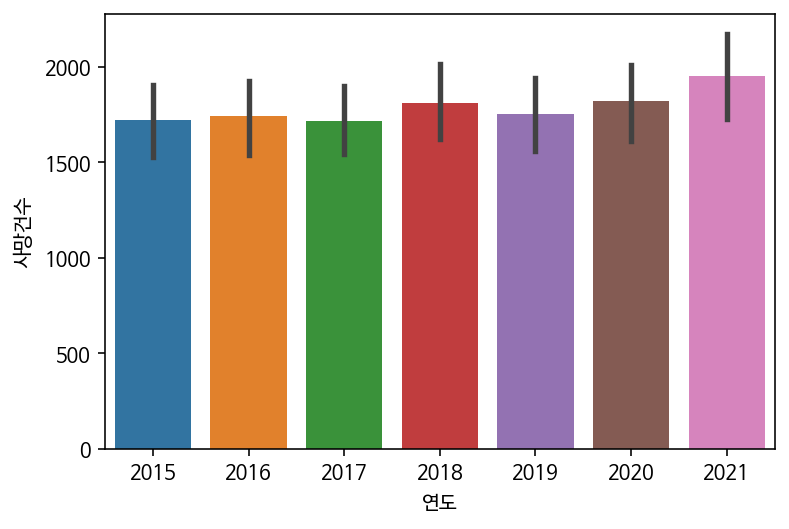

In [12]:
sns.barplot(x=df_1_melt["연도"], y=df_1_melt["사망건수"])

In [13]:
df_1_melt.sort_values("사망건수")["자치구별"].unique()

array(['중구', '종로구', '용산구', '금천구', '성동구', '광진구', '서초구', '서대문구', '마포구',
       '영등포구', '동작구', '구로구', '도봉구', '강남구', '동대문구', '강동구', '양천구', '강북구',
       '관악구', '중랑구', '성북구', '송파구', '은평구', '강서구', '노원구'], dtype=object)

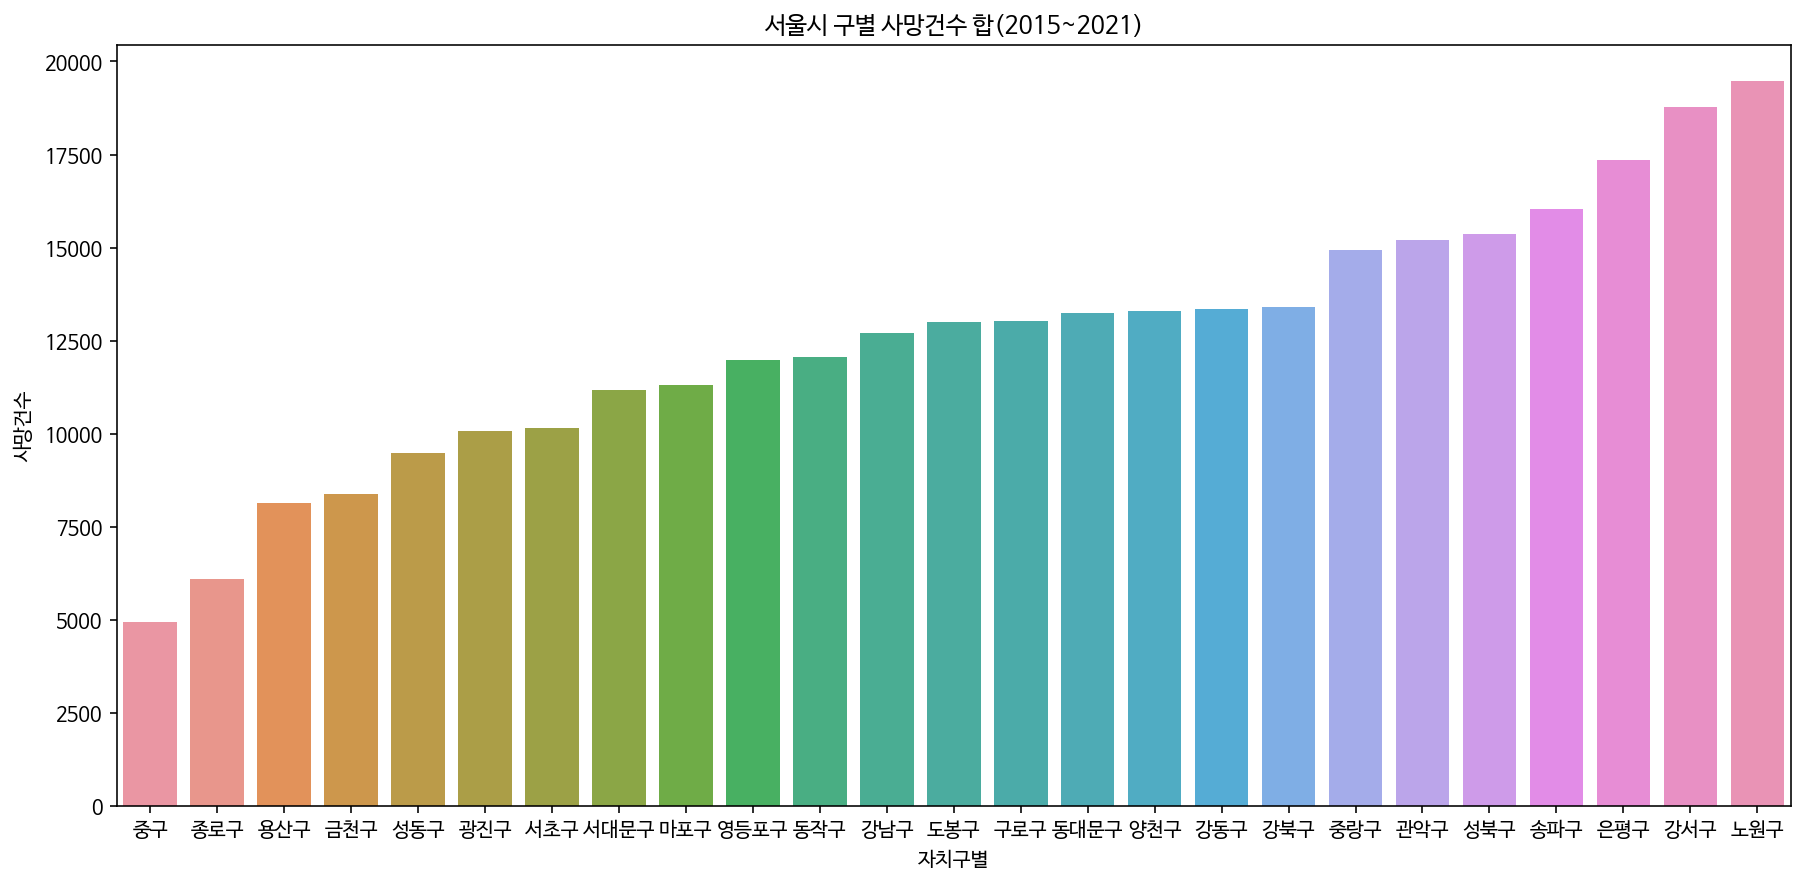

In [14]:
plt.figure(figsize=(15, 7))
df_temp = df_1_melt.drop(columns="연도").groupby("자치구별").sum().reset_index().sort_values("사망건수")
plt.title("서울시 구별 사망건수 합(2015~2021)")
sns.barplot(x=df_temp["자치구별"], 
            y=df_temp["사망건수"])

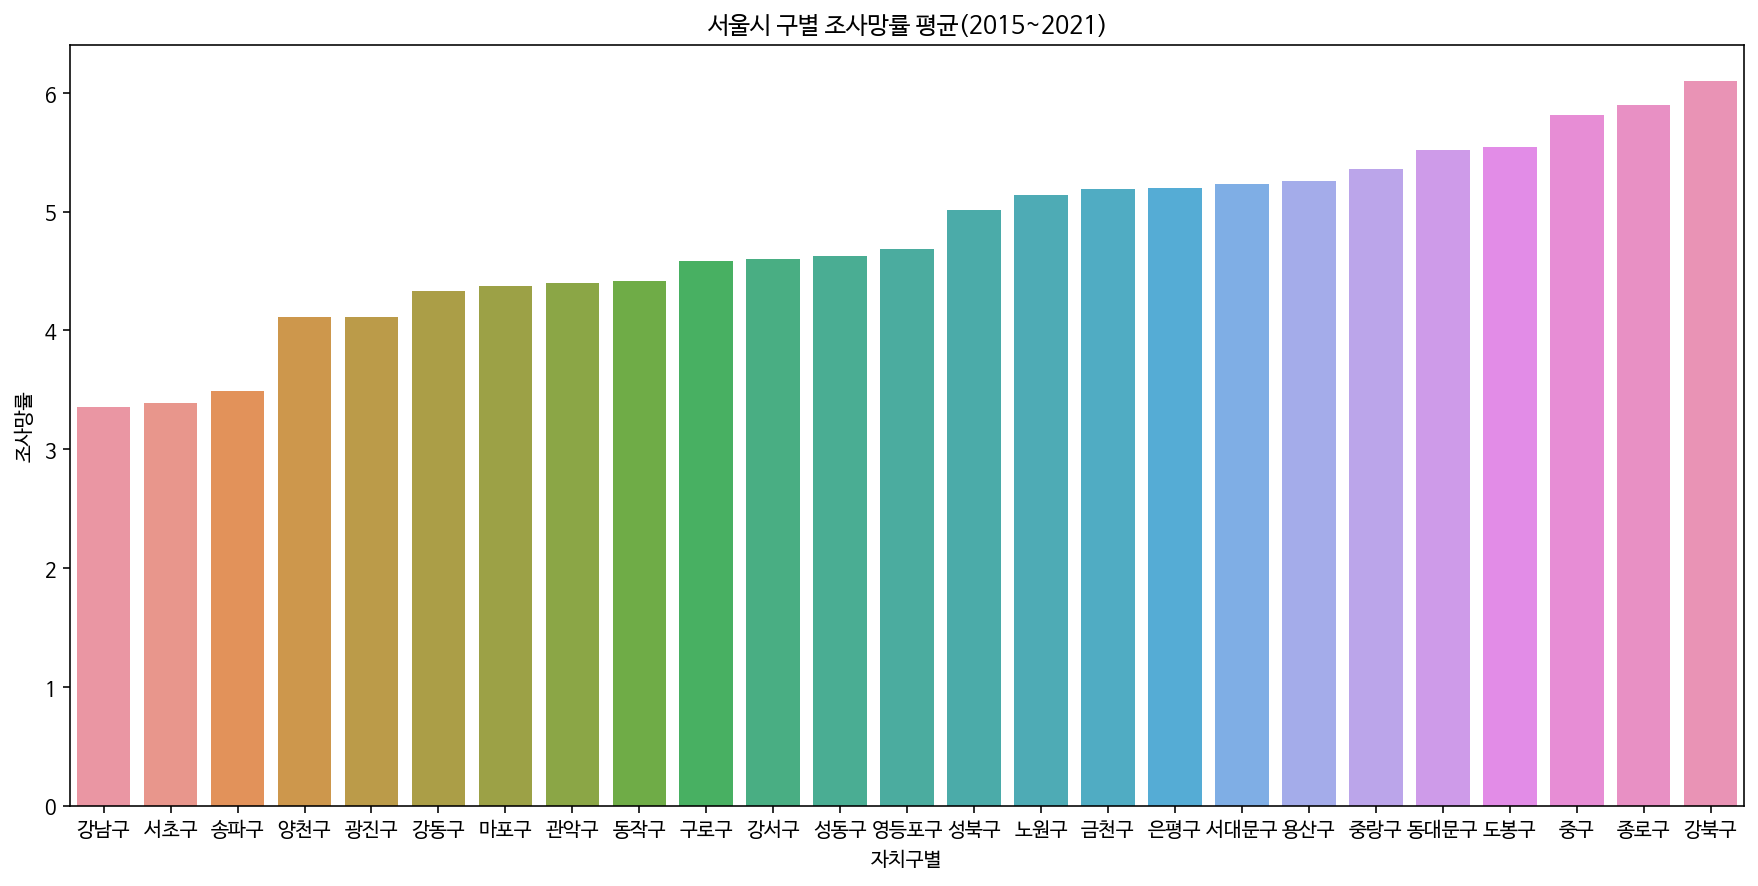

In [15]:
plt.figure(figsize=(15, 7))
df_temp = df_1_melt.drop(columns="연도").groupby("자치구별").mean().reset_index().sort_values("조사망률")
plt.title("서울시 구별 조사망률 평균(2015~2021)")
sns.barplot(x=df_temp["자치구별"], 
            y=df_temp["조사망률"])

### 과징금 데이터

In [16]:
# 과징금 데이터
df_2 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EA%B3%BC%EC%A7%95%EA%B8%88%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")

In [17]:
df_2.shape

(26, 8)

In [18]:
df_2.head()

,0,1,2,3,4,5,6,7
0,자치구별,2015,2016,2017,2018,2019,2020,2021
1,종로구,5154,4326,5827,5396,5957,5811,4915
2,중구,7971,7127,6425,6964,7469,8449,7005
3,용산구,2905,2738,2534,2554,3410,3640,3314
4,성동구,2450,1898,2536,2189,2950,2990,2805


In [19]:
df_2.columns = df_2.iloc[0]
df_2 = df_2.iloc[1:]
df_2

,자치구별,2015,2016,2017,2018,2019,2020,2021
1,종로구,5154,4326,5827,5396,5957,5811,4915
2,중구,7971,7127,6425,6964,7469,8449,7005
3,용산구,2905,2738,2534,2554,3410,3640,3314
4,성동구,2450,1898,2536,2189,2950,2990,2805
5,광진구,1698,4539,5346,5494,4876,5319,6543
6,동대문구,2864,2388,2683,2746,3411,3192,3467
7,중랑구,2763,2694,3895,3965,4550,4856,4607
8,성북구,2938,2218,2748,2409,2738,3169,2824
9,강북구,1834,1919,2156,2152,2520,2436,2109
10,도봉구,1141,1336,1526,1784,1527,1288,1466


In [20]:
df_2.columns

Index(['자치구별', 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='object', name=0)

In [21]:
#과징금 melt
df_2_melt = df_2.melt(
    id_vars='자치구별', 
    var_name="연도",
    value_name="과징금"
    )
df_2_melt.head()
# 근데 과징금 단위가 얼마지?

,자치구별,연도,과징금
0,종로구,2015,5154
1,중구,2015,7971
2,용산구,2015,2905
3,성동구,2015,2450
4,광진구,2015,1698


##### 없앨거(사유: 데이터 변경에 따른 삭제)

In [22]:
# df_2_t = df_2[:]
# # 구(시군구의 구) 결측치 채우기
# df_2_t[0] = df_2_t[0].fillna(method="ffill")
# #연도 결측치 채우기(원래 xlsx를 엑셀로 열었을 때의 데이터엔 있음)
# df_2_t.iloc[0] = df_2_t.iloc[0].fillna(method="ffill")

# # 서울시 데이터는 필요 없으므로 제거
# df_2_t = df_2_t[(df_2_t[0] !="서울시")]
# df_2_t.head()

In [23]:
# #시 (서울시 데이터), 계(합계 데이터) 제거
# df_2_t = df_2_t.T
# df_2_t = df_2_t[(df_2_t[2]!="시") & (df_2_t[2]!="계")].drop(columns=2).T
# # df_2_t.head()

In [24]:
# #2017년에 빠진 결측치 라벨 채우기
# df_2_t[22].loc[1] = "예산현액"
# df_2_t[25].loc[1] = "결산"
# df_2_t

In [25]:
# #0번째 행을 column으로
# df_2_t.columns = df_2_t.iloc[0]
# df_2_t = df_2_t.iloc[1:]
# df_2_t.head()

In [26]:
# df_2_t2 = df_2_t[:]
# df_2_t2

In [27]:
# df_2_t2.T

In [28]:
# df_2_t2_total = df_2_t2.T[(df_2_t2.T[1]=="결산") | (df_2_t2.T[1]=="자치구별")].drop(columns=1)
# df_2_t2_total

In [29]:
# df_2_t2.melt(
#     id_vars="자치구별",
#     value_vars=df_2_t2.columns[2:]
# )[]

In [30]:
# df_2_t.T

In [31]:
# df_2_t.iloc[0] = df_2_t.iloc[0].apply(lambda x: x.replace("\u3000\u3000\u3000", "") if isinstance(x, str) else x).fillna(method="ffill")
# df_2_t

In [32]:
# df_2_t.iloc[0].unique()

### 재정자립도 데이터

#### 재정 자립도 참고사항

1. 재정자립도 = 자체수입(지방세+세외수입) / 일반회계 예산액 *100
2. 평균은 예산순계, 자치단체별을 예산총계 기준임
3. 2010-2011 : ( )는 세입과목 개편전 기준으로 산정한 재정자립도임
4. 2014-2020 : 세입과목 개편후 기준으로 산정한 재정자립도임(2014-2016은 ( )에 해당하는 수치)

출처: https://data.seoul.go.kr/dataList/188/S/2/datasetView.do

In [33]:
df_3.head()

,0,1,2,3,4,5,6,7
0,자치구별,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
1,종로구,50.0,50.4,50.8,47.4,47.4,47.0,47.2
2,중구,58.6,57.1,58.4,53.4,54.9,53.5,55.3
3,용산구,40.1,41.0,42.4,41.1,39.2,39.3,41.7
4,성동구,34.5,37.3,34.5,34.1,32.5,32.7,33.2


In [34]:
df_3.columns = df_3.iloc[0].apply(lambda x: str(x).replace(".0",""))
df_3 = df_3.iloc[1:]
df_3

,자치구별,2015,2016,2017,2018,2019,2020,2021
1,종로구,50.0,50.4,50.8,47.4,47.4,47.0,47.2
2,중구,58.6,57.1,58.4,53.4,54.9,53.5,55.3
3,용산구,40.1,41.0,42.4,41.1,39.2,39.3,41.7
4,성동구,34.5,37.3,34.5,34.1,32.5,32.7,33.2
5,광진구,27.4,27.2,28.1,27.1,26.7,26.2,26.1
6,동대문구,27.0,27.8,27.2,25.6,23.8,23.2,24.5
7,중랑구,23.2,21.0,20.6,19.0,18.1,17.5,18.2
8,성북구,22.4,22.8,21.8,19.6,19.6,20.0,20.6
9,강북구,18.6,19.1,18.8,17.6,16.8,16.8,17.2
10,도봉구,19.5,20.4,19.8,18.5,17.8,18.4,18.9


In [35]:
df_temp = df_3.T.reset_index()
df_temp.columns = df_temp.iloc[0]
df_temp = df_temp.iloc[1:]
df_temp.rename(columns={"자치구별": "연도"}, inplace=True)
df_temp.set_index("연도")
df_temp.head()

,연도,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
1,2015,50.0,58.6,40.1,34.5,27.4,27.0,23.2,22.4,18.6,...,22.4,25.1,27.4,44.2,28.7,21.6,57.4,60.0,42.1,29.2
2,2016,50.4,57.1,41.0,37.3,27.2,27.8,21.0,22.8,19.1,...,22.5,24.8,26.8,42.8,28.7,20.7,57.9,60.0,42.9,30.2
3,2017,50.8,58.4,42.4,34.5,28.1,27.2,20.6,21.8,18.8,...,21.6,24.0,27.2,42.0,27.2,20.6,52.5,58.2,42.8,30.1
4,2018,47.4,53.4,41.1,34.1,27.1,25.6,19.0,19.6,17.6,...,21.5,22.5,25.6,37.9,26.8,19.4,53.4,53.3,39.0,31.0
5,2019,47.4,54.9,39.2,32.5,26.7,23.8,18.1,19.6,16.8,...,19.7,21.8,25.3,35.7,26.0,18.7,53.3,54.4,38.4,22.2


In [36]:
df_temp

,연도,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
1,2015,50.0,58.6,40.1,34.5,27.4,27.0,23.2,22.4,18.6,...,22.4,25.1,27.4,44.2,28.7,21.6,57.4,60.0,42.1,29.2
2,2016,50.4,57.1,41.0,37.3,27.2,27.8,21.0,22.8,19.1,...,22.5,24.8,26.8,42.8,28.7,20.7,57.9,60.0,42.9,30.2
3,2017,50.8,58.4,42.4,34.5,28.1,27.2,20.6,21.8,18.8,...,21.6,24.0,27.2,42.0,27.2,20.6,52.5,58.2,42.8,30.1
4,2018,47.4,53.4,41.1,34.1,27.1,25.6,19.0,19.6,17.6,...,21.5,22.5,25.6,37.9,26.8,19.4,53.4,53.3,39.0,31.0
5,2019,47.4,54.9,39.2,32.5,26.7,23.8,18.1,19.6,16.8,...,19.7,21.8,25.3,35.7,26.0,18.7,53.3,54.4,38.4,22.2
6,2020,47.0,53.5,39.3,32.7,26.2,23.2,17.5,20.0,16.8,...,21.1,22.2,24.7,36.0,26.4,19.3,54.7,52.3,37.6,26.3
7,2021,47.2,55.3,41.7,33.2,26.1,24.5,18.2,20.6,17.2,...,21.9,22.5,26.3,36.5,29.1,19.7,58.2,54.9,39.8,26.7


In [37]:
df_temp["연도"]

1    2015
2    2016
3    2017
4    2018
5    2019
6    2020
7    2021
Name: 연도, dtype: object

In [38]:
df_temp.index = df_temp["연도"]
df_temp.drop(columns="연도", inplace=True)
df_temp

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
연도,,,,,,,,,,,,,,,,,,,,,
2015,50.0,58.6,40.1,34.5,27.4,27.0,23.2,22.4,18.6,19.5,...,22.4,25.1,27.4,44.2,28.7,21.6,57.4,60.0,42.1,29.2
2016,50.4,57.1,41.0,37.3,27.2,27.8,21.0,22.8,19.1,20.4,...,22.5,24.8,26.8,42.8,28.7,20.7,57.9,60.0,42.9,30.2
2017,50.8,58.4,42.4,34.5,28.1,27.2,20.6,21.8,18.8,19.8,...,21.6,24.0,27.2,42.0,27.2,20.6,52.5,58.2,42.8,30.1
2018,47.4,53.4,41.1,34.1,27.1,25.6,19.0,19.6,17.6,18.5,...,21.5,22.5,25.6,37.9,26.8,19.4,53.4,53.3,39.0,31.0
2019,47.4,54.9,39.2,32.5,26.7,23.8,18.1,19.6,16.8,17.8,...,19.7,21.8,25.3,35.7,26.0,18.7,53.3,54.4,38.4,22.2
2020,47.0,53.5,39.3,32.7,26.2,23.2,17.5,20.0,16.8,18.4,...,21.1,22.2,24.7,36.0,26.4,19.3,54.7,52.3,37.6,26.3
2021,47.2,55.3,41.7,33.2,26.1,24.5,18.2,20.6,17.2,18.9,...,21.9,22.5,26.3,36.5,29.1,19.7,58.2,54.9,39.8,26.7


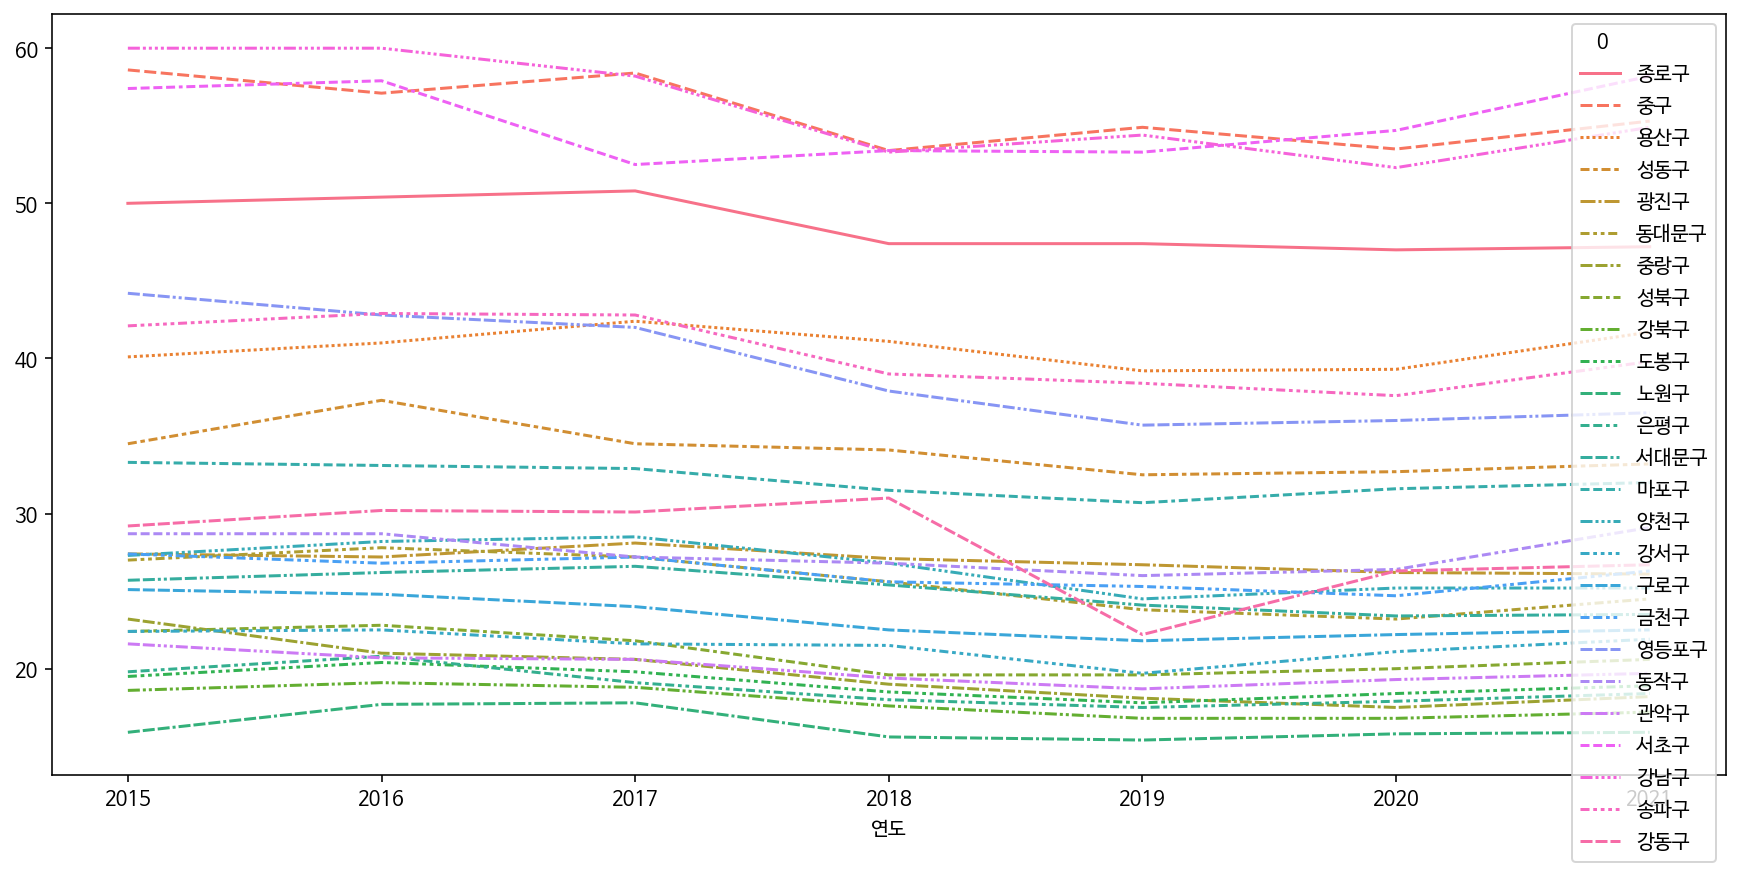

In [39]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_temp)

In [40]:
df_3_melt = df_3.melt(id_vars="자치구별", 
          value_vars=df_3.columns[1:],
          var_name="연도",
          value_name="재정자립도")
df_3_melt.head()

,자치구별,연도,재정자립도
0,종로구,2015,50.0
1,중구,2015,58.6
2,용산구,2015,40.1
3,성동구,2015,34.5
4,광진구,2015,27.4


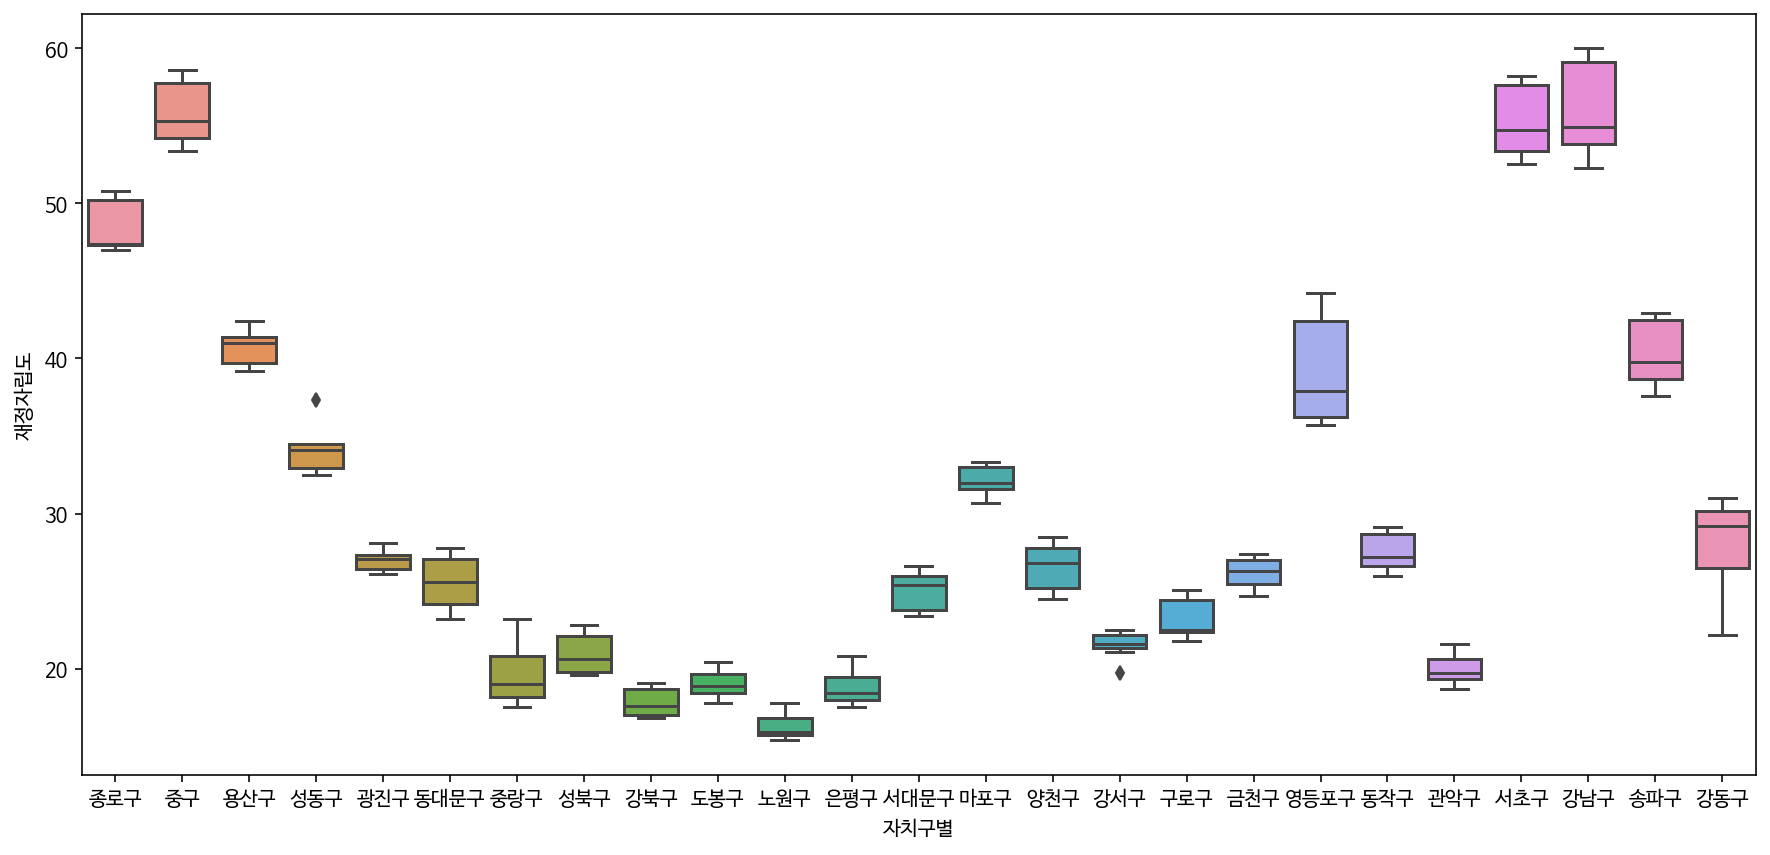

In [41]:
#구별로 보기
plt.figure(figsize=(15, 7))
sns.boxplot(x="자치구별", y="재정자립도", data=df_3_melt)

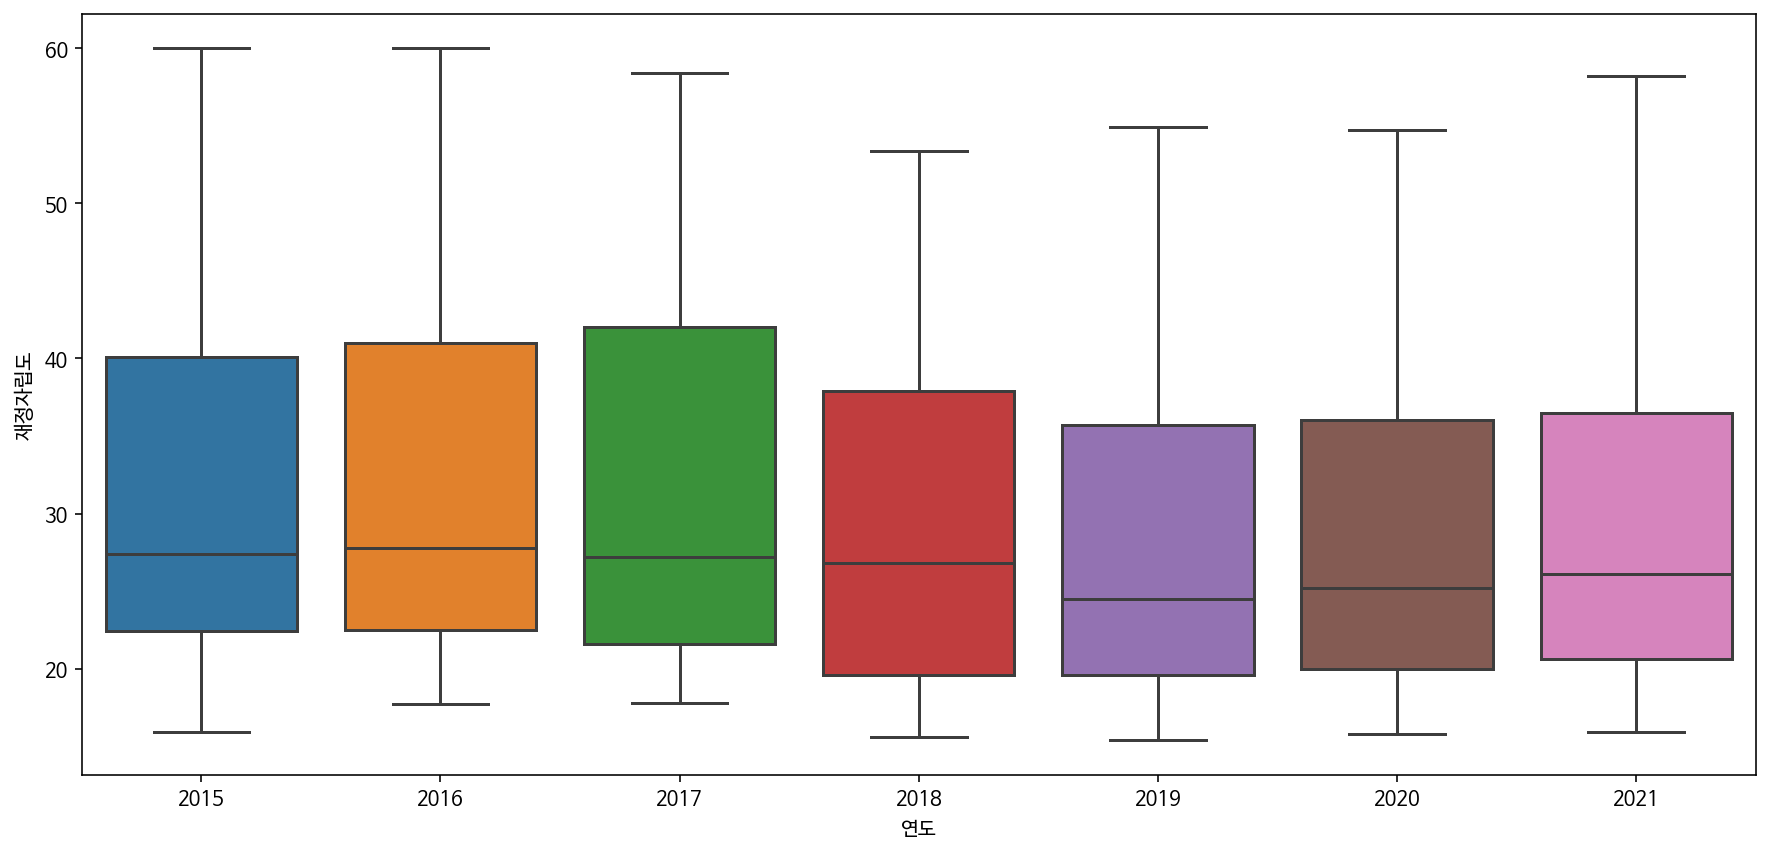

In [42]:
# 연도별로 보기
plt.figure(figsize=(15, 7))
sns.boxplot(x="연도", y="재정자립도", data=df_3_melt)

### 재정 자주도 데이터

In [43]:
df_4.head()

,0,1,2,3,4,5,6,7,8,9
0,자치구별,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
1,종로구,69.9,64.9,66.9,67.8,65.4,63.6,62.2,61.8,64.9
2,중구,67.9,62.9,62.5,63.9,61.2,61.1,59.5,59.9,61.0
3,용산구,58.1,54.9,57.6,60.0,59.3,55.5,54.6,57.9,58.7
4,성동구,52.2,55.2,58.4,57.4,57.5,54.8,53.5,53.0,55.7


In [44]:
df_4.columns = df_4.iloc[0].apply(lambda x: str(x).replace(".0",""))
df_4 = df_4.iloc[1:]
df_4.head()

,자치구별,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,종로구,69.9,64.9,66.9,67.8,65.4,63.6,62.2,61.8,64.9
2,중구,67.9,62.9,62.5,63.9,61.2,61.1,59.5,59.9,61.0
3,용산구,58.1,54.9,57.6,60.0,59.3,55.5,54.6,57.9,58.7
4,성동구,52.2,55.2,58.4,57.4,57.5,54.8,53.5,53.0,55.7
5,광진구,59.3,55.8,55.3,56.5,53.9,52.0,50.8,49.6,48.7


In [45]:
df_4_melt = df_4.melt(id_vars="자치구별", 
          value_vars=df_3.columns[1:],
          var_name="연도",
          value_name="재정자주도")
df_4_melt.head()

,자치구별,연도,재정자주도
0,종로구,2015,64.9
1,중구,2015,62.9
2,용산구,2015,54.9
3,성동구,2015,55.2
4,광진구,2015,55.8


In [46]:
df_data = pd.concat([
    df_1_melt.sort_values(["연도", "자치구별"]),
    df_2_melt.sort_values(["연도", "자치구별"])["과징금"],
    df_3_melt.sort_values(["연도", "자치구별"])["재정자립도"],
    df_4_melt.sort_values(["연도", "자치구별"])["재정자주도"]
], axis=1)
df_data.head()

,연도,자치구별,사망건수,조사망률,과징금,재정자립도,재정자주도
0,2015,종로구,829,5.5,5154,50.0,64.9
1,2016,종로구,823,5.5,7971,58.6,62.9
2,2017,종로구,826,5.6,2905,40.1,54.9
3,2018,종로구,897,6,2450,34.5,55.2
4,2019,종로구,854,5.8,1698,27.4,55.8


- `df_data`가 최종 전처리된 데이터프레임입니다. 

# 상관분석

## 가설 설정

In [47]:
df_data["과징금"] = df_data["과징금"].apply(float)
df_data["연도"] = df_data["연도"].apply(float)
df_data["조사망률"] = df_data["조사망률"].apply(float)

df_data["과징금"] = np.log(df_data["과징금"])
df_data["조사망률"] = np.log(df_data["조사망률"])
df_data["재정자립도"] = np.log(df_data["재정자립도"])
df_data["재정자주도"] = np.log(df_data["재정자주도"])


df_data

,연도,자치구별,사망건수,조사망률,과징금,재정자립도,재정자주도
0,2015.0,종로구,6.720220,1.704748,8.547528,3.912023,4.172848
1,2016.0,종로구,6.712956,1.704748,8.983565,4.070735,4.141546
2,2017.0,종로구,6.716595,1.722767,7.974189,3.691376,4.005513
3,2018.0,종로구,6.799056,1.791759,7.803843,3.540959,4.010963
4,2019.0,종로구,6.749931,1.757858,7.437206,3.310543,4.021774
...,...,...,...,...,...,...,...
170,2017.0,강동구,7.537430,1.458615,8.760767,2.980619,3.819908
171,2018.0,강동구,7.552237,1.504077,8.750841,4.063885,4.117410
172,2019.0,강동구,7.548556,1.504077,8.839422,4.005513,4.025352
173,2020.0,강동구,7.550135,1.458615,9.298168,3.683867,3.830813


## 상관 분석 조건 확인

In [48]:
df_2015 = df_data[df_data["연도"]==2015]
df_2015
df_2016 = df_data[df_data["연도"]==2016]
df_2016
df_2017 = df_data[df_data["연도"]==2017]
df_2017
df_2018 = df_data[df_data["연도"]==2018]
df_2018
df_2019 = df_data[df_data["연도"]==2019]
df_2019
df_2020 = df_data[df_data["연도"]==2020]
df_2020
df_2021 = df_data[df_data["연도"]==2021]
df_2021

,연도,자치구별,사망건수,조사망률,과징금,재정자립도,재정자주도
6,2021.0,종로구,6.889591,1.931521,7.924072,3.144152,3.906005
13,2021.0,중구,6.692084,1.902108,8.281724,3.505557,3.933784
20,2021.0,용산구,7.142827,1.757858,8.008366,3.072693,3.887730
27,2021.0,성동구,7.258412,1.609438,7.914983,3.713572,4.053523
34,2021.0,광진구,7.323831,1.504077,7.197435,3.015535,3.945458
41,2021.0,동대문구,7.630947,1.824549,7.593878,3.210844,3.925926
48,2021.0,중랑구,7.748891,1.791759,8.881975,3.758872,3.955082
55,2021.0,성북구,7.749322,1.686399,7.894691,3.303217,3.981549
62,2021.0,강북구,7.618742,1.916923,8.116716,3.280911,3.996364
69,2021.0,도봉구,7.602900,1.840550,8.431417,3.303217,3.931826


In [81]:
#정규성 검증 : 샤피로 테스트
import math
from scipy.stats import shapiro, pearsonr
#연도별 사망률 data 정규성 검정      #2015~2021년
print("year : 2015")
print(shapiro(df_2015["조사망률"]))
print("기각",shapiro(df_2015["과징금"]))         
print(shapiro(df_2015["재정자립도"]))
print(shapiro(df_2015["재정자주도"]))
print()
print("year : 2016")
print(shapiro(df_2016["조사망률"]))
print(shapiro(df_2016["과징금"]))
print(shapiro(df_2016["재정자립도"]))
print(shapiro(df_2016["재정자주도"]))
print()
print("year : 2017")
print(shapiro(df_2017["조사망률"]))
print(shapiro(df_2017["과징금"]))
print(shapiro(df_2017["재정자립도"]))
print(shapiro(df_2017["재정자주도"]))
print()
print("year : 2018")
print(shapiro(df_2018["조사망률"]))
print(shapiro(df_2018["과징금"]))
print(shapiro(df_2018["재정자립도"]))
print(shapiro(df_2018["재정자주도"]))
print()
print("year : 2019")
print(shapiro(df_2019["조사망률"]))
print(shapiro(df_2019["과징금"]))
print(shapiro(df_2019["재정자립도"]))
print(shapiro(df_2019["재정자주도"]))
print()
print("year : 2020")
print(shapiro(df_2020["조사망률"]))
print(shapiro(df_2020["과징금"]))
print(shapiro(df_2020["재정자립도"]))
print(shapiro(df_2020["재정자주도"]))
print()
print("year : 2021")
print(shapiro(df_2021["조사망률"]))
print(shapiro(df_2021["과징금"]))
print(shapiro(df_2021["재정자립도"]))
print(shapiro(df_2021["재정자주도"]))
#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)   
#  p-value < 0.05 , data가 normal을 따른다고 볼 수 없다.
#  (적어도 한 변수가 정규성) 을 만족해야 피어슨 검정 가능
# 사망률이 정규성을 띄므로 사망률과 재정지표(변수3개) 간의 상관분석 가능. (적어도 한 변수가 정규)

year : 2015
ShapiroResult(statistic=0.9393413662910461, pvalue=0.1429327130317688)
기각 ShapiroResult(statistic=0.8682966828346252, pvalue=0.003999457694590092)
ShapiroResult(statistic=0.9336947202682495, pvalue=0.10579819232225418)
ShapiroResult(statistic=0.9518082737922668, pvalue=0.27528464794158936)

year : 2016
ShapiroResult(statistic=0.9366828799247742, pvalue=0.12406135350465775)
ShapiroResult(statistic=0.9819969534873962, pvalue=0.921605110168457)
ShapiroResult(statistic=0.9458248019218445, pvalue=0.20153343677520752)
ShapiroResult(statistic=0.9641083478927612, pvalue=0.502192497253418)

year : 2017
ShapiroResult(statistic=0.9534679651260376, pvalue=0.2996996343135834)
ShapiroResult(statistic=0.982795000076294, pvalue=0.9343043565750122)
ShapiroResult(statistic=0.938782274723053, pvalue=0.13874153792858124)
ShapiroResult(statistic=0.9687470197677612, pvalue=0.6134791970252991)

year : 2018
ShapiroResult(statistic=0.9388000965118408, pvalue=0.13887332379817963)
ShapiroResult(stati

피어슨의 상관계수를 통한 상관분석 진행.
전제 1. 두 변수는 모두 연속형 변수 (만족)
     2. 두 변수중 적어도 한 변수는 정규성 만족해야함 (만족)

In [73]:
print(pearsonr(df_2015["조사망률"],df_2015["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2015["조사망률"],df_2015["재정자립도"])[1])
print(pearsonr(df_2015["조사망률"],df_2015["재정자주도"])[1])
print(pearsonr(df_2016["조사망률"],df_2016["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2016["조사망률"],df_2016["재정자립도"])[1])
print(pearsonr(df_2016["조사망률"],df_2016["재정자주도"])[1])
print(pearsonr(df_2017["조사망률"],df_2017["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2017["조사망률"],df_2017["재정자립도"])[1])
print(pearsonr(df_2017["조사망률"],df_2017["재정자주도"])[1])
print(pearsonr(df_2018["조사망률"],df_2018["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2018["조사망률"],df_2018["재정자립도"])[1])
print(pearsonr(df_2018["조사망률"],df_2018["재정자주도"])[1])
print(pearsonr(df_2019["조사망률"],df_2019["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2019["조사망률"],df_2019["재정자립도"])[1])
print(pearsonr(df_2019["조사망률"],df_2019["재정자주도"])[1])
print(pearsonr(df_2020["조사망률"],df_2020["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2020["조사망률"],df_2020["재정자립도"])[1])
print(pearsonr(df_2020["조사망률"],df_2020["재정자주도"])[1])
print(pearsonr(df_2021["조사망률"],df_2021["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2021["조사망률"],df_2021["재정자립도"])[1])
print(pearsonr(df_2021["조사망률"],df_2021["재정자주도"])[1])    
#p값이 0.05보다 클 경우 상관계수가 유의미하지않음.
# 따라서 상관계수가 유의미하지 않기 때문에, 가설을 수정한다.

0.361574474888479
0.5732592160082303
0.25640736311127166
0.20440139729299306
0.8632117061333274
0.440800831361301
0.24002063343381078
0.8667873041493086
0.47470030976738936
0.09396717211378477
0.3907075185680479
0.6718026725373822
0.17217276874093265
0.9638899603453214
0.34602519598240666
0.6889998042715648
0.9477131684383946
0.8642103736167599
0.15945480579141127
0.5434161625484777
0.3462139546421821


In [83]:
# 재정지표내에서, 과징금과 재정자주도의 상관관계만을 분석한다.

print("기각",pearsonr(df_2015["과징금"],df_2015["재정자주도"])[1]) #p값 검증해보기. 
print("기각",pearsonr(df_2016["과징금"],df_2016["재정자주도"])[1])
print(pearsonr(df_2017["과징금"],df_2017["재정자주도"])[1])
print(pearsonr(df_2018["과징금"],df_2018["재정자주도"])[1])
print("기각",pearsonr(df_2019["과징금"],df_2019["재정자주도"])[1])
print("기각",pearsonr(df_2020["과징금"],df_2020["재정자주도"])[1])
print(pearsonr(df_2021["과징금"],df_2021["재정자주도"])[1])    
#p값이 0.05보다 큰경우 상관계수가 유의미하지않음.
# 2017,2018,2021 data의 상관계수만 유의하므로, 전체 7개의 연도 중 3개 년도에 대해서만 성립한다. 
#따라서 재정자주도와 과징금은 큰 연관성이 있다고 해석하기 어렵다.

기각 0.5743970455510142
기각 0.05174946489343148
0.012133895962451456
0.08047794771951779
기각 0.26708233995788944
기각 0.13753494802409602
0.014326433285347837


In [85]:
# 재정지표내에서, 과징금과 재정자립도의 상관관계만을 분석한다.

print("기각",pearsonr(df_2015["과징금"],df_2015["재정자립도"])[1]) #p값 검증해보기. 
print(pearsonr(df_2016["과징금"],df_2016["재정자립도"])[1])
print(pearsonr(df_2017["과징금"],df_2017["재정자립도"])[1])
print(pearsonr(df_2018["과징금"],df_2018["재정자립도"])[1])
print(pearsonr(df_2019["과징금"],df_2019["재정자립도"])[1])
print(pearsonr(df_2020["과징금"],df_2020["재정자립도"])[1])
print(pearsonr(df_2021["과징금"],df_2021["재정자립도"])[1])    
#p값이 0.05보다 큰경우 상관계수가 유의미하지않음.
# 2015년을 제외한 다른 년도의 data의 상관계수만 유의하므로, 2015년도를 제외한 다른 연도에 대하여 상관분석을 진행한다.

기각 0.7612043588019538
0.00011672104680836239
0.00018200358292320637
0.00030174723955224143
0.0007674827343920012
0.0011252876277969544
6.243512181466953e-06


In [68]:
# 상관계수 값 추출.
a1 = pearsonr(df_2016["과징금"],df_2016["재정자립도"])[0] 
b1 = pearsonr(df_2017["과징금"],df_2017["재정자립도"])[0] 
c1 = pearsonr(df_2018["과징금"],df_2018["재정자립도"])[0]
d1 = pearsonr(df_2019["과징금"],df_2019["재정자립도"])[0]
e1 = pearsonr(df_2020["과징금"],df_2020["재정자립도"])[0]
f1 = pearsonr(df_2021["과징금"],df_2021["재정자립도"])[0]

In [69]:
# 2017, 2018, 2021 년도
df_final = pd.DataFrame({"2016": [round(a1,3)],
                         "2017": [round(b1,3)],
                         "2018": [round(c1,3)],
                         "2019": [round(d1,3)],
                         "2020": [round(e1,3)],
                         "2021": [round(f1,3)]},
                         index=['재정자주도'])
df_final
# 연도별 과징금과 재정자주도의 상관계수 데이터프레임
# 모든 상관계수가 0.6보다 크므로 데이터는 커다란 연관성이 있다고 해석할 수 있다.

,2016,2017,2018,2019,2020,2021
재정자주도,0.695,0.68,0.663,0.628,0.613,0.772


### 가설검정
귀무가설 (H0) :모 집단에서 두변수 사이에 선형적인 상관성이 없다.
대립가설 (H1): 모 집단에서 두변수 사이에 선형적인 상관성이 있다.

## 상관 분석 진행 및 결과 정리

# 회귀분석


In [86]:
# 남쪽전체 및 북쪽전체 의 과징금과 재정자립도 간의 관계 분석
# 서울 북쪽에 있는 구 전체병합, 남쪽에 있는 구 전체병합
#강북: 은평구,마포구,서대문구,종로구,중구,용산구,성북구,강북구,도봉구,노원구,동대문구,성동구,중랑구,광진구 2
#강남 : 강서구, 양천구,구로구,영등포구,금천구,동작구,관악구,서초구,강남구,송파구,강동구 1

df_sn = df_data
for gu in df_data["자치구별"].unique():
  if(gu == "강서구" or gu == "양천구" or gu == "구로구" or gu == "영등포구" or gu == "금천구" or gu == "동작구" or gu == "관악구" or gu == "서초구" or gu == "강남구" or gu == "송파구" or gu == "강남구" or gu == "강동구"):    
    df_sn.loc[df_sn['자치구별'] == gu, '강'] = 1
  else:
    df_sn.loc[df_sn['자치구별'] == gu, '강'] = 2

In [89]:
South = df_sn[df_sn["강"]==1]
North = df_sn[df_sn["강"]==2]

South2016 = South[South['연도']==2016]
South2017 = South[South['연도']==2017]
South2018 = South[South['연도']==2018] 
South2019 = South[South['연도']==2019]
South2020 = South[South['연도']==2020]
South2021 = South[South['연도']==2021]


North2016 = North[North['연도']==2016]
North2017 = North[North['연도']==2017]
North2018 = North[North['연도']==2018] 
North2019 = North[North['연도']==2019]
North2020 = North[North['연도']==2020]
North2021 = North[North['연도']==2021]



In [88]:
print(South2017)
#data수가 15개 이하로 작기 때문에 이상치 제거는 생략한다.
#이상치 관련 추가언급 필요.

         연도  자치구별      사망건수      조사망률       과징금     재정자립도     재정자주도    강
100  2017.0   양천구  7.498316  1.335001  8.692322  3.858622  4.152613  1.0
107  2017.0   강서구  7.853216  1.481605  7.914983  2.975530  3.837299  1.0
114  2017.0   구로구  7.466799  1.458615  8.074026  3.198673  3.871201  1.0
121  2017.0   금천구  7.062192  1.609438  9.047468  3.975936  4.075841  1.0
128  2017.0  영등포구  7.352441  1.458615  8.003029  3.487375  3.979682  1.0
135  2017.0   동작구  7.403061  1.435085  7.327781  2.760010  3.718438  1.0
142  2017.0   관악구  7.634337  1.435085  7.757479  3.206803  3.910021  1.0
149  2017.0   서초구  7.276556  1.193922  8.491055  3.269569  3.887730  1.0
156  2017.0   강남구  7.470794  1.163151  8.435332  2.901422  3.742420  1.0
163  2017.0   송파구  7.713785  1.223775  8.371705  3.465736  3.883624  1.0
170  2017.0   강동구  7.537430  1.458615  8.760767  2.980619  3.819908  1.0


In [90]:
#정규성 검증 : 샤피로 테스트
import math
from scipy.stats import shapiro, pearsonr
#강북, 강남 data 정규성 검정  
print("year : 2016")
print(shapiro(South2016["과징금"]))
print(shapiro(South2016["재정자립도"]))
print(shapiro(North2016["과징금"]))
print(shapiro(North2016["재정자립도"]))
print()
print("year : 2017")
print(shapiro(South2017["과징금"]))
print(shapiro(South2017["재정자립도"]))
print(shapiro(North2017["과징금"]))
print(shapiro(North2017["재정자립도"]))
print()
print("year : 2018")
print(shapiro(South2018["과징금"]))
print(shapiro(South2018["재정자립도"]))
print(shapiro(North2018["과징금"]))
print(shapiro(North2018["재정자립도"]))
print()
print("year : 2019")
print(shapiro(South2019["과징금"]))
print(shapiro(South2019["재정자립도"]))
print(shapiro(North2019["과징금"]))
print(shapiro(North2019["재정자립도"]))
print()
print("year : 2020")
print(shapiro(South2020["과징금"]))
print(shapiro(South2020["재정자립도"]))
print(shapiro(North2020["과징금"]))
print(shapiro(North2020["재정자립도"]))
print()
print("year : 2021")
print(shapiro(South2021["과징금"]))
print(shapiro(South2021["재정자립도"]))
print(shapiro(North2021["과징금"]))
print(shapiro(North2021["재정자립도"]))
#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)   
#  p-value < 0.05 , data가 normal을 따른다고 볼 수 없다.
#  변수가 정규성을 만족해야 피어슨 검정 가능


year : 2016
ShapiroResult(statistic=0.9305750131607056, pvalue=0.41670024394989014)
ShapiroResult(statistic=0.9253231883049011, pvalue=0.3654956817626953)
ShapiroResult(statistic=0.8997544050216675, pvalue=0.11186227947473526)
ShapiroResult(statistic=0.9280315637588501, pvalue=0.2862890362739563)

year : 2017
ShapiroResult(statistic=0.983284056186676, pvalue=0.9816495776176453)
ShapiroResult(statistic=0.9385563135147095, pvalue=0.5036783814430237)
ShapiroResult(statistic=0.9747298359870911, pvalue=0.9327000975608826)
ShapiroResult(statistic=0.9246373772621155, pvalue=0.2562384009361267)

year : 2018
ShapiroResult(statistic=0.9510337114334106, pvalue=0.657187819480896)
ShapiroResult(statistic=0.8797287940979004, pvalue=0.10322417318820953)
ShapiroResult(statistic=0.9632096886634827, pvalue=0.7753962874412537)
ShapiroResult(statistic=0.9707696437835693, pvalue=0.8867824077606201)

year : 2019
ShapiroResult(statistic=0.9581882953643799, pvalue=0.7489001154899597)
ShapiroResult(statistic=0

In [91]:
print("south")
print(pearsonr(South2016["과징금"],South2016["재정자립도"])) #p값 검증해보기. 
print(pearsonr(South2017["과징금"],South2017["재정자립도"]))
print(pearsonr(South2018["과징금"],South2018["재정자립도"]))
print(pearsonr(South2019["과징금"],South2019["재정자립도"]))
print(pearsonr(South2020["과징금"],South2020["재정자립도"]))
print(pearsonr(South2021["과징금"],South2021["재정자립도"]))
print()
print("north")
print(pearsonr(North2016["과징금"],North2016["재정자립도"])) #p값 검증해보기. 
print(pearsonr(North2017["과징금"],North2017["재정자립도"]))
print(pearsonr(North2018["과징금"],North2018["재정자립도"]))
print(pearsonr(North2019["과징금"],North2019["재정자립도"]))
print(pearsonr(North2020["과징금"],North2020["재정자립도"]))
print(pearsonr(North2021["과징금"],North2021["재정자립도"]))

  # (상관계수값, p값) 이 출력됨.   
#p값이 0.05보다 큰경우 상관계수가 유의미하지않음.
# 강북의 경우는 모든 연도에서 유의, 강남에서는 2016년, 2020년에을 제외한 연도만 상관계수가 유의하므로, 이에 대해 상관관계를 알아본다.

south
(0.580583135776356, 0.06109938308142635)
(0.6133776027239575, 0.044754308442083966)
(0.7896060498144329, 0.0038445046161927955)
(0.820191895544377, 0.001987618155868737)
(0.33785095478257177, 0.3095541399640903)
(0.7869582481241983, 0.00405037871939038)

north
(0.8709444329162109, 5.0224263577745397e-05)
(0.7783708508413181, 0.001041238183967234)
(0.5144818906429304, 0.059793753315837715)
(0.4799643151283759, 0.08240415628149904)
(0.9118688989245763, 5.582143334103989e-06)
(0.773900612305421, 0.0011615282445139943)


## 가설 설정

## 회귀 분석 조건 확인

### 가설 검정

## 회귀 분석 진행 및 결과 정리

In [93]:
import statsmodels.api as sm


for year in df_data["연도"].unique():
  if(year != 2015):
    df_temp = df_data[df_data["연도"]==year]    
    model1 = sm.OLS(df_temp["과징금"], df_temp["재정자립도"])    
    fitted_model1=model1.fit()
    print("-"*78)
    print(" ")
    print(" "*35,'\033[1m' + str(year) + '\033[0m')
    print(fitted_model1.summary())
    
df_south = df_sn[df_sn["강"]==1]
df_north = df_sn[df_sn["강"]==2]

for year in df_south["연도"].unique():
  
  if(year == 2017 or year == 2018 or year == 2019 or year ==2021):
    df_temp = df_south[df_south["연도"]==year]
    model1 = sm.OLS(df_temp["과징금"], df_temp["재정자립도"])
    fitted_model1=model1.fit()
    print("-"*78)
    print(" ")
    print(" "*35,'\033[1m' + str(year) + '\033[0m')
    print(fitted_model1.summary())

for year in df_north["연도"].unique():
  
  if(year != 2015):
    df_temp = df_south[df_south["연도"]==year]
    model1 = sm.OLS(df_temp["과징금"], df_temp["재정자립도"])
    fitted_model1=model1.fit()
    print("-"*78)
    print(" ")
    print(" "*35,'\033[1m' + str(year) + '\033[0m')
    print(fitted_model1.summary())

------------------------------------------------------------------------------
 
                                    2016
                                 OLS Regression Results                                
Dep. Variable:                    과징금   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3468.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):                    1.80e-27
Time:                        12:22:52   Log-Likelihood:                         -25.837
No. Observations:                  25   AIC:                                      53.67
Df Residuals:                      24   BIC:                                      54.89
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                 

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtos

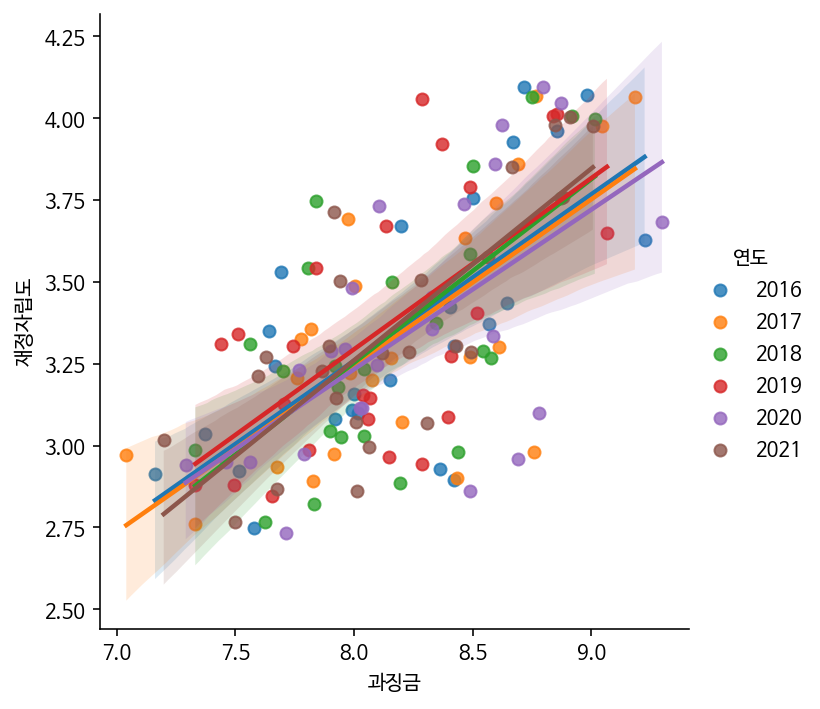

In [95]:
df_temp = df_data[df_data["연도"]!=2015]    
sns.lmplot(x="과징금", y="재정자립도", hue ="연도", data=df_temp)

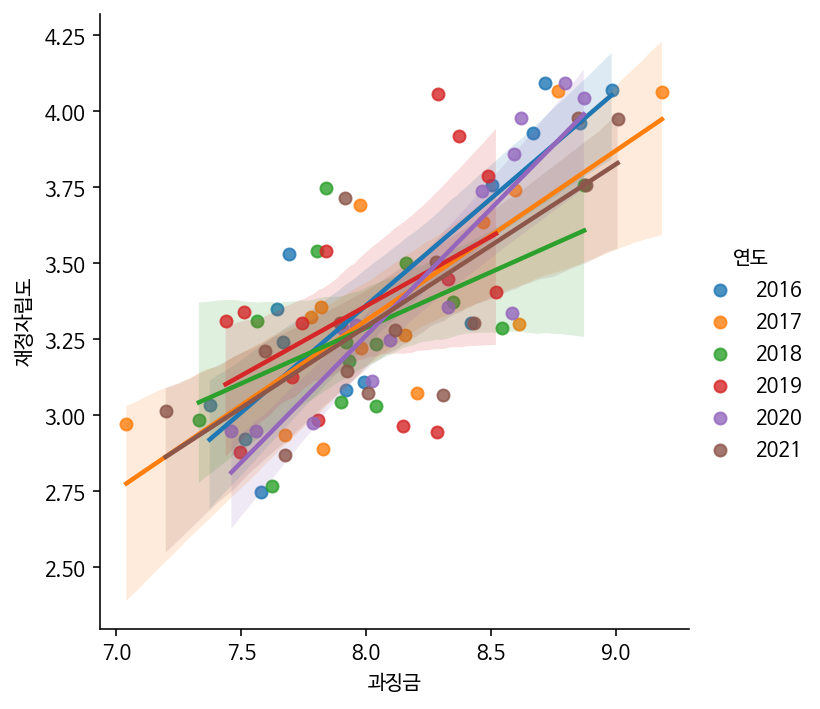

In [97]:
df_temp = df_north[df_north["연도"]!=2015]    
sns.lmplot(x="과징금", y="재정자립도", hue ="연도", data=df_temp)



/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


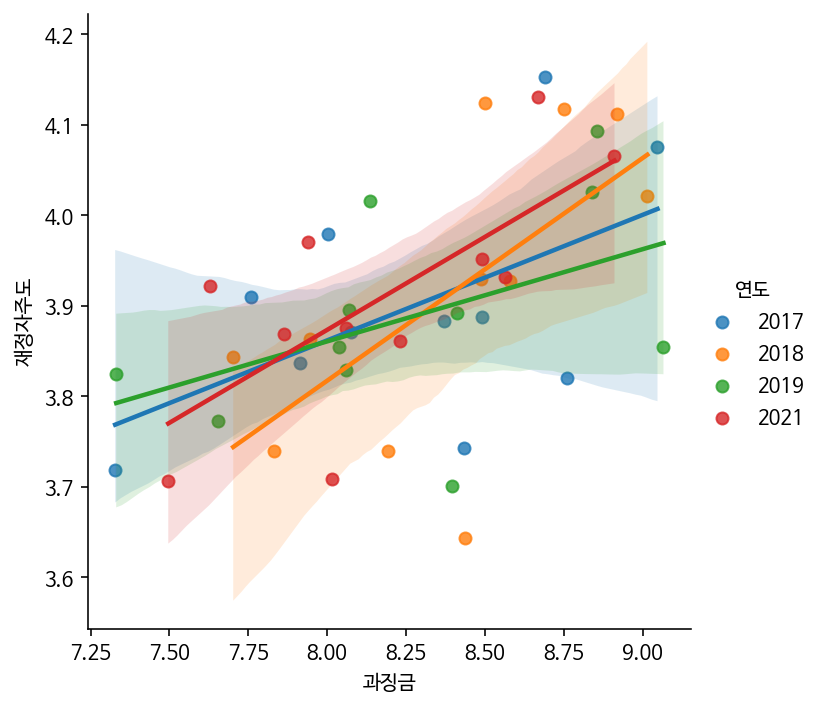

In [98]:
for year in df_south["연도"].unique():
  if(year == 2015 or year == 2016 or year ==2020):
    df_south.loc[df_sn['연도'] == year, '회귀'] = 0
  else:
    df_south.loc[df_sn['연도'] == year, '회귀'] = 1
sns.lmplot(x="과징금", y="재정자주도", hue ="연도", data=df_south[df_south['회귀']==1])

# 결론